In [11]:
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history, title):
    print(history.history.keys())
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

In [13]:
import pandas as pd
import numpy as np
import re
Tweet = pd.read_csv('data/Tweets.csv', 'utf-8', delimiter=',')

Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: {'negative':0, 'neutral':1, 'positive':2}.get(x))
Tweet['cleaned_text'] = Tweet['text'].apply(lambda x: re.sub('[^a-zA-Z\s]','',x ).lower())


36
26.0
virginamerica what dhepburn said
[78, 57, 5989, 216]
[  78   57 5989  216    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Found 14562 unique tokens.
Number of input features 26.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 100)           1456300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 256)           365568    
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 256)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 256)           1024      
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
__

/common/workspaces/python-workspace/keras_virtual/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 11712 samples, validate on 2928 samples
Epoch 1/5
11712/11712 [==============================] - 43s 4ms/step - loss: 0.8150 - accuracy: 0.6684 - val_loss: 0.6854 - val_accuracy: 0.6793
Epoch 2/5
11712/11712 [==============================] - 42s 4ms/step - loss: 0.5171 - accuracy: 0.7997 - val_loss: 0.5633 - val_accuracy: 0.7886
Epoch 3/5
11712/11712 [==============================] - 40s 3ms/step - loss: 0.3818 - accuracy: 0.8658 - val_loss: 0.6022 - val_accuracy: 0.7650
Epoch 4/5
11712/11712 [==============================] - 43s 4ms/step - loss: 0.2879 - accuracy: 0.8996 - val_loss: 0.5966 - val_accuracy: 0.7995
Epoch 5/5
11712/11712 [==============================] - 45s 4ms/step - loss: 0.2232 - accuracy: 0.9224 - val_loss: 0.6358 - val_accuracy: 0.7783
Training Accuracy: 0.9564
Testing Accuracy:  0.7783


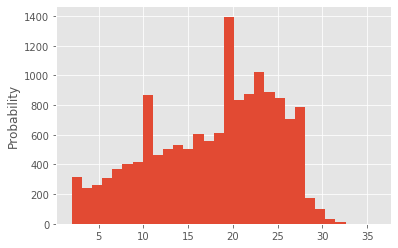

In [14]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer 
from keras import preprocessing
from keras.utils import to_categorical

from keras.models import Sequential
from keras import layers

maxlen = 26
sentences = Tweet['cleaned_text'].values
org_sentences = Tweet['cleaned_text'].values
lens = [len(s.split(' ')) for s in sentences]
print(max(lens))
print(np.percentile(lens, 90))


plt.hist(lens,  bins=30)
plt.ylabel('Probability');

tokenizer = Tokenizer()                                  
tokenizer.fit_on_texts(sentences)                                        

print(sentences[0])
sentences = tokenizer.texts_to_sequences(sentences) 
print(sentences[0])
sentences = preprocessing.sequence.pad_sequences(sentences, maxlen=maxlen, padding='post')
print(sentences[0])

word_index = tokenizer.word_index                              

print('Found %s unique tokens.' % len(word_index))

y = Tweet['sentiment'].values
y_encoded = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(sentences,y_encoded, test_size=0.2,random_state=42)
_,X_test_sentences,_,_ = train_test_split(org_sentences,y_encoded, test_size=0.2,random_state=42) 

input_dim = X_train.shape[1]  # Number of features
print('Number of input features %d.' % input_dim)

model = Sequential()
model.add(layers.Embedding(len(word_index) + 1, 100, input_length=maxlen))
model.add(layers.LSTM(units=256, return_sequences=True))
model.add(layers.Dropout(rate=0.2))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(units=256, return_sequences=False))          
model.add(layers.Dropout(rate=0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))




dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


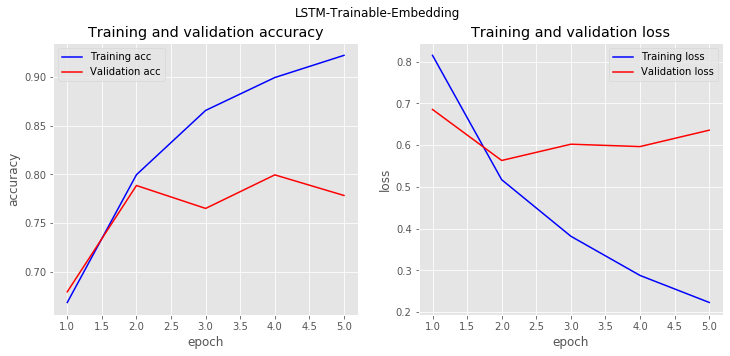

In [16]:
plot_history(history, 'LSTM-Trainable-Embedding')

              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      1889
     neutral       0.60      0.55      0.57       580
     postive       0.64      0.75      0.69       459

    accuracy                           0.78      2928
   macro avg       0.70      0.72      0.71      2928
weighted avg       0.78      0.78      0.78      2928



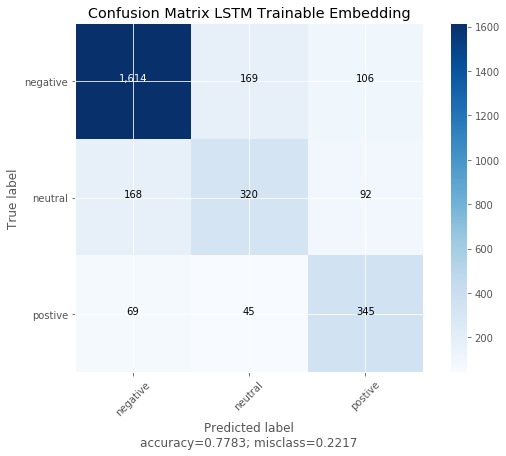

0.5800946765030366

In [17]:
predictions =  model.predict(X_test)

predictions = np.argmax(predictions, axis=1)
y_test_true =  np.argmax(y_test, axis=1)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

target_names = ['negative', 'neutral', 'postive']
#target_names = ['negative', 'postive']
print(classification_report(y_test_true, predictions, target_names=target_names))
           
cm = confusion_matrix(y_test_true, predictions)
plot_confusion_matrix(cm, normalize=False, target_names = target_names, title = "Confusion Matrix LSTM Trainable Embedding")

from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test_true, predictions)

In [ ]:
for i in range(len(X_test_sentences)):
    if (y_test_true[i]==0 and predictions[i]==2):
        print('%s true=%d pre=%d' % (X_test_sentences[i], y_test_true[i], predictions[i]))